# Global Superstore Data Analysis and Visualization

In [1]:
# Importing Libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Reading CSV

In [1]:
df=pd.read_csv('C:\\global3.csv')
df.head()

NameError: name 'pd' is not defined

In [339]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
51285,29002,IN-2015-KE1642066-42174,19-06-2015,19-06-2015,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium,2015
51286,34337,US-2014-ZD21925140-41765,06-05-2014,10-05-2014,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High,2014
51287,31315,CA-2012-ZD21925140-41147,26-08-2012,31-08-2012,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Office Supplies,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High,2012
51288,9596,MX-2013-RB1979518-41322,17-02-2013,21-02-2013,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium,2013
51289,6147,MX-2013-MC1810093-41416,22-05-2013,26-05-2013,Second Class,MC-1810093,Mick Crebagga,Consumer,NaN,Tipitapa,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",$61.38,3,0.0,$1.80,1.002,High,2013


In [340]:
df.shape

(51290, 25)

In [341]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year'],
      dtype='object')

In [342]:
df=df.drop(['Row ID','Order ID','Customer ID','Postal Code','Product ID'],axis=1)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,11-11-2014,13-11-2014,First Class,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High,2014
1,05-02-2014,07-02-2014,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical,2014
2,17-10-2014,18-10-2014,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium,2014
3,28-01-2014,30-01-2014,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium,2014
4,05-11-2014,06-11-2014,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical,2014


# Finding the Duplicates

In [343]:
df.duplicated().sum()

0

# Finding The Null Values

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Date       51290 non-null  object 
 2   Ship Mode       51290 non-null  object 
 3   Customer Name   51290 non-null  object 
 4   Segment         51290 non-null  object 
 5   City            51290 non-null  object 
 6   State           51290 non-null  object 
 7   Country         51290 non-null  object 
 8   Region          51290 non-null  object 
 9   Market          51290 non-null  object 
 10  Category        51290 non-null  object 
 11  Sub-Category    51290 non-null  object 
 12  Product Name    51290 non-null  object 
 13  Sales           51290 non-null  object 
 14  Quantity        51290 non-null  int64  
 15  Discount        51290 non-null  float64
 16  Profit          51290 non-null  object 
 17  Shipping Cost   51290 non-null 

# Removing '.' and ',' and '$' from sales column

In [345]:
df['Sales'] = df['Sales'].str.replace('\,','')
df['Sales'] = df['Sales'].str.replace('\$','')
df['Sales'] = df['Sales'].astype(float)    # convert the data type into float
df['Sales']

    

C:\Users\Pangat\AppData\Local\Temp\ipykernel_5004\2630930754.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sales'] = df['Sales'].str.replace('\,','')
C:\Users\Pangat\AppData\Local\Temp\ipykernel_5004\2630930754.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sales'] = df['Sales'].str.replace('\$','')


0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
          ...   
51285      65.10
51286      16.72
51287       8.56
51288      13.44
51289      61.38
Name: Sales, Length: 51290, dtype: float64

In [346]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,11-11-2014,13-11-2014,First Class,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,$62.15,40.77,High,2014
1,05-02-2014,07-02-2014,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-$288.77,923.63,Critical,2014
2,17-10-2014,18-10-2014,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,$919.97,915.49,Medium,2014
3,28-01-2014,30-01-2014,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-$96.54,910.16,Medium,2014
4,05-11-2014,06-11-2014,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,$311.52,903.04,Critical,2014


# Removing the '$' and ',' from profit column

In [347]:
df['Profit'] = df['Profit'].str.replace('\,','')
df['Profit'] = df['Profit'].str.replace('\$','')
df['Profit'] = df['Profit'].astype(float)
df['Profit']

C:\Users\Pangat\AppData\Local\Temp\ipykernel_5004\2305655508.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Profit'] = df['Profit'].str.replace('\,','')
C:\Users\Pangat\AppData\Local\Temp\ipykernel_5004\2305655508.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Profit'] = df['Profit'].str.replace('\$','')


0         62.15
1       -288.77
2        919.97
3        -96.54
4        311.52
          ...  
51285      4.50
51286      3.34
51287      2.48
51288      2.40
51289      1.80
Name: Profit, Length: 51290, dtype: float64

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Date      51290 non-null  object 
 1   Ship Date       51290 non-null  object 
 2   Ship Mode       51290 non-null  object 
 3   Customer Name   51290 non-null  object 
 4   Segment         51290 non-null  object 
 5   City            51290 non-null  object 
 6   State           51290 non-null  object 
 7   Country         51290 non-null  object 
 8   Region          51290 non-null  object 
 9   Market          51290 non-null  object 
 10  Category        51290 non-null  object 
 11  Sub-Category    51290 non-null  object 
 12  Product Name    51290 non-null  object 
 13  Sales           51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Discount        51290 non-null  float64
 16  Profit          51290 non-null  float64
 17  Shipping Cost   51290 non-null 

# Multiplying Discount with 100

In [349]:
discount=df.Discount*100
df['Discount']=discount
df['Discount']

0         0.0
1        10.0
2        10.0
3        10.0
4         0.0
         ... 
51285     0.0
51286    20.0
51287     0.0
51288     0.0
51289     0.0
Name: Discount, Length: 51290, dtype: float64

In [350]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,Market,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,11-11-2014,13-11-2014,First Class,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014
1,05-02-2014,07-02-2014,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,10.0,-288.77,923.63,Critical,2014
2,17-10-2014,18-10-2014,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,10.0,919.97,915.49,Medium,2014
3,28-01-2014,30-01-2014,First Class,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,10.0,-96.54,910.16,Medium,2014
4,05-11-2014,06-11-2014,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014


# Cleaning the Ship Mode Column

In [351]:
ShipMode = df['Ship Mode'].value_counts(ascending  = False)
ShipMode

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

# Cleaning Segment Column

In [352]:
Segment = df['Segment'].value_counts(ascending  = False)
Segment

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

# Cleaning City Column

In [353]:
City = df['City'].value_counts(ascending  = False)
City.head(20)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
Manila           432
Seattle          428
Houston          377
Tegucigalpa      362
Jakarta          337
Managua          336
Lagos            333
Istanbul         314
Chicago          314
Mexico City      299
Bangkok          287
London           281
Sydney           271
Cairo            248
Vienna           245
Name: City, dtype: int64

In [354]:
City_less_than100=City[City<100]
City_less_than100

Newark                        95
Richmond                      94
Geelong                       94
Santiago de los Caballeros    93
Izmir                         93
                              ..
Caraguatatuba                  1
Arad                           1
Tatuí                          1
Maidstone                      1
Victoria Falls                 1
Name: City, Length: 3575, dtype: int64

In [355]:
def handle_City(value):
    if (value in City_less_than100):
        pass
    else:
        return value
        
df['City'] = df['City'].apply(handle_City)
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Guadalajara      102
Bogotá           102
Bandung          101
Johannesburg     101
Ankara           100
Name: City, Length: 75, dtype: int64

# Cleaning the State Column 

In [356]:
State = df['State'].value_counts(ascending  = False)
State_less_than300=State[State<300]

def handle_State(value):
    if(value in State_less_than300):
        pass
    else:
        return value
        
df['State'] = df['State'].apply(handle_State)
df['State'].value_counts()

California                    2001
England                       1499
New York                      1128
Texas                          985
Ile-de-France                  981
New South Wales                781
North Rhine-Westphalia         719
Queensland                     717
San Salvador                   615
Pennsylvania                   587
National Capital               583
Washington                     506
Illinois                       492
Victoria                       491
Ohio                           469
Distrito Federal               468
Santo Domingo                  443
Istanbul                       425
São Paulo                      408
Guatemala                      391
Provence-Alpes-Côte d'Azur     390
Florida                        383
Managua                        368
Francisco Morazán              362
Jakarta                        337
Lagos                          333
Panama                         325
Western Australia              312
Name: State, dtype: 

# Cleaning the Country Column 

In [357]:
Country = df['Country'].value_counts(ascending  = False)
Country_less_than400=Country[Country<400]

def handle_Country(value):
    if(value in Country_less_than400):
        return 'others'
    else:
        return value
        
df['Country'] = df['Country'].apply(handle_Country)
df['Country'].value_counts()

others                10846
United States          9994
Australia              2837
France                 2827
Mexico                 2635
Germany                2063
China                  1880
United Kingdom         1633
Brazil                 1593
India                  1554
Indonesia              1390
Turkey                 1378
Italy                  1100
Nigeria                 905
Spain                   859
Dominican Republic      742
El Salvador             736
Cuba                    724
Honduras                713
Philippines             681
New Zealand             628
Nicaragua               614
Iran                    607
Guatemala               521
Egypt                   487
South Africa            457
Morocco                 451
Netherlands             435
Name: Country, dtype: int64

# Cleaning the Region Column 

In [358]:
Region = df['Region'].value_counts(ascending  = False)
Region_less_than100=Region[Region<100]

def handle_Region(value):
    if(value in Region_less_than100):
        return 'others'
    else:
        return value
        
df['Region'] = df['Region'].apply(handle_Region)
df['Region'].value_counts()

Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: Region, dtype: int64

# Cleaning The Market and Category Columns

In [359]:
Market = df['Market'].value_counts(ascending  = False)
Market

Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: Market, dtype: int64

In [360]:
Category = df['Category'].value_counts(ascending  = False)
Category

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

# Renaming the 'Sub-Ctegory' as 'Sub_Category'

In [361]:
df.rename(columns = {'Sub-Category':'Sub_Category'}, inplace = True)
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,Market,Category,Sub_Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,11-11-2014,13-11-2014,First Class,Aaron Bergman,Consumer,None,None,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014
1,05-02-2014,07-02-2014,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,10.0,-288.77,923.63,Critical,2014
2,17-10-2014,18-10-2014,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,10.0,919.97,915.49,Medium,2014
3,28-01-2014,30-01-2014,First Class,Katherine Murray,Home Office,Berlin,None,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,10.0,-96.54,910.16,Medium,2014
4,05-11-2014,06-11-2014,Same Day,Rick Hansen,Consumer,None,None,others,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014


# Cleaning the sub_Category and OrderPriority Columns

In [362]:
Sub_Category = df['Sub_Category'].value_counts(ascending  = False)
Sub_Category

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Labels         2601
Fasteners      2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub_Category, dtype: int64

In [363]:
OrderPriority = df['Order Priority'].value_counts(ascending  = False)
OrderPriority

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

# Grouping the Sales and Profit based on Sub_category

In [364]:
Profit_Sales = df.groupby('Sub_Category')["Sales","Profit"]
Profit_Sales.first()

C:\Users\Pangat\AppData\Local\Temp\ipykernel_5004\622899768.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Profit_Sales = df.groupby('Sub_Category')["Sales","Profit"]


,Sales,Profit
Sub_Category,,
Accessories,34.77,11.47
Appliances,3701.52,1036.08
Art,17.94,4.66
Binders,49.41,18.53
Bookcases,341.96,54.71
Chairs,3709.40,-288.77
Copiers,2832.96,311.52
Envelopes,26.22,12.32
Fasteners,247.84,121.44


In [365]:
Profit_Sales.sum()

,Sales,Profit
Sub_Category,,
Accessories,749237.28,129626.44
Appliances,1010535.76,141562.63
Art,371613.70,57829.90
Binders,461870.09,72432.92
Bookcases,1466572.55,161924.37
Chairs,1501682.16,140396.24
Copiers,1509436.51,258567.63
Envelopes,169217.58,28849.26
Fasteners,89495.19,13844.08


In [366]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Region,Market,Category,Sub_Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,11-11-2014,13-11-2014,First Class,Aaron Bergman,Consumer,None,None,United States,Central US,USCA,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014
1,05-02-2014,07-02-2014,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,10.0,-288.77,923.63,Critical,2014
2,17-10-2014,18-10-2014,First Class,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,10.0,919.97,915.49,Medium,2014
3,28-01-2014,30-01-2014,First Class,Katherine Murray,Home Office,Berlin,None,Germany,Western Europe,Europe,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,10.0,-96.54,910.16,Medium,2014
4,05-11-2014,06-11-2014,Same Day,Rick Hansen,Consumer,None,None,others,Western Africa,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014


In [367]:
df.to_csv("clean.csv")

# Now data is cleaned

# Analyzing the Data

# Percentage of Shiping the materials(ShipMode)

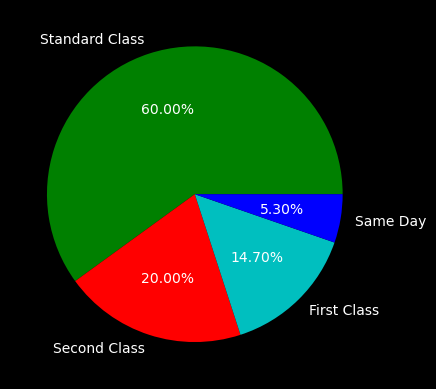

In [368]:
stu=['Standard Class','Second Class','First Class','Same Day']
colors=['g','r','c','b']
plt.pie([60,20,14.7,5.3],labels=stu,autopct="%0.2f%%",colors=colors)
plt.show()

# Percentage of Segment

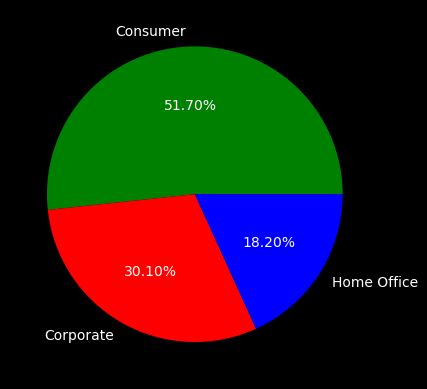

In [369]:
stu=['Consumer','Corporate','Home Office']
colors=['g','r','b']
plt.pie([51.7,30.1,18.2],labels=stu,autopct="%0.2f%%",colors=colors)
plt.show()

# Visualizing The City

C:\Users\Pangat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


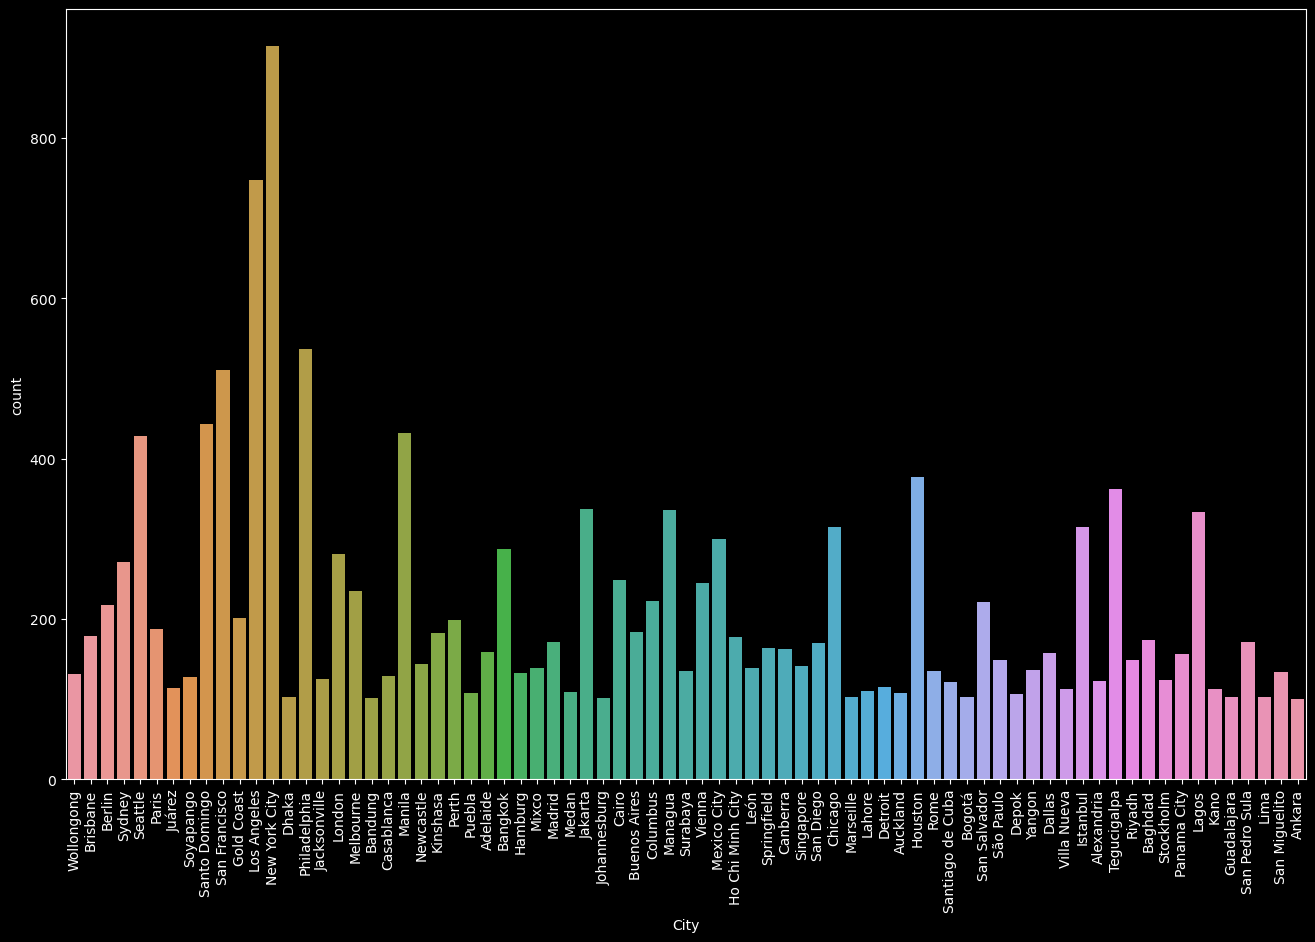

In [370]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['City'])
plt.xticks(rotation=90)
plt.show()

# Visualizing The States

C:\Users\Pangat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


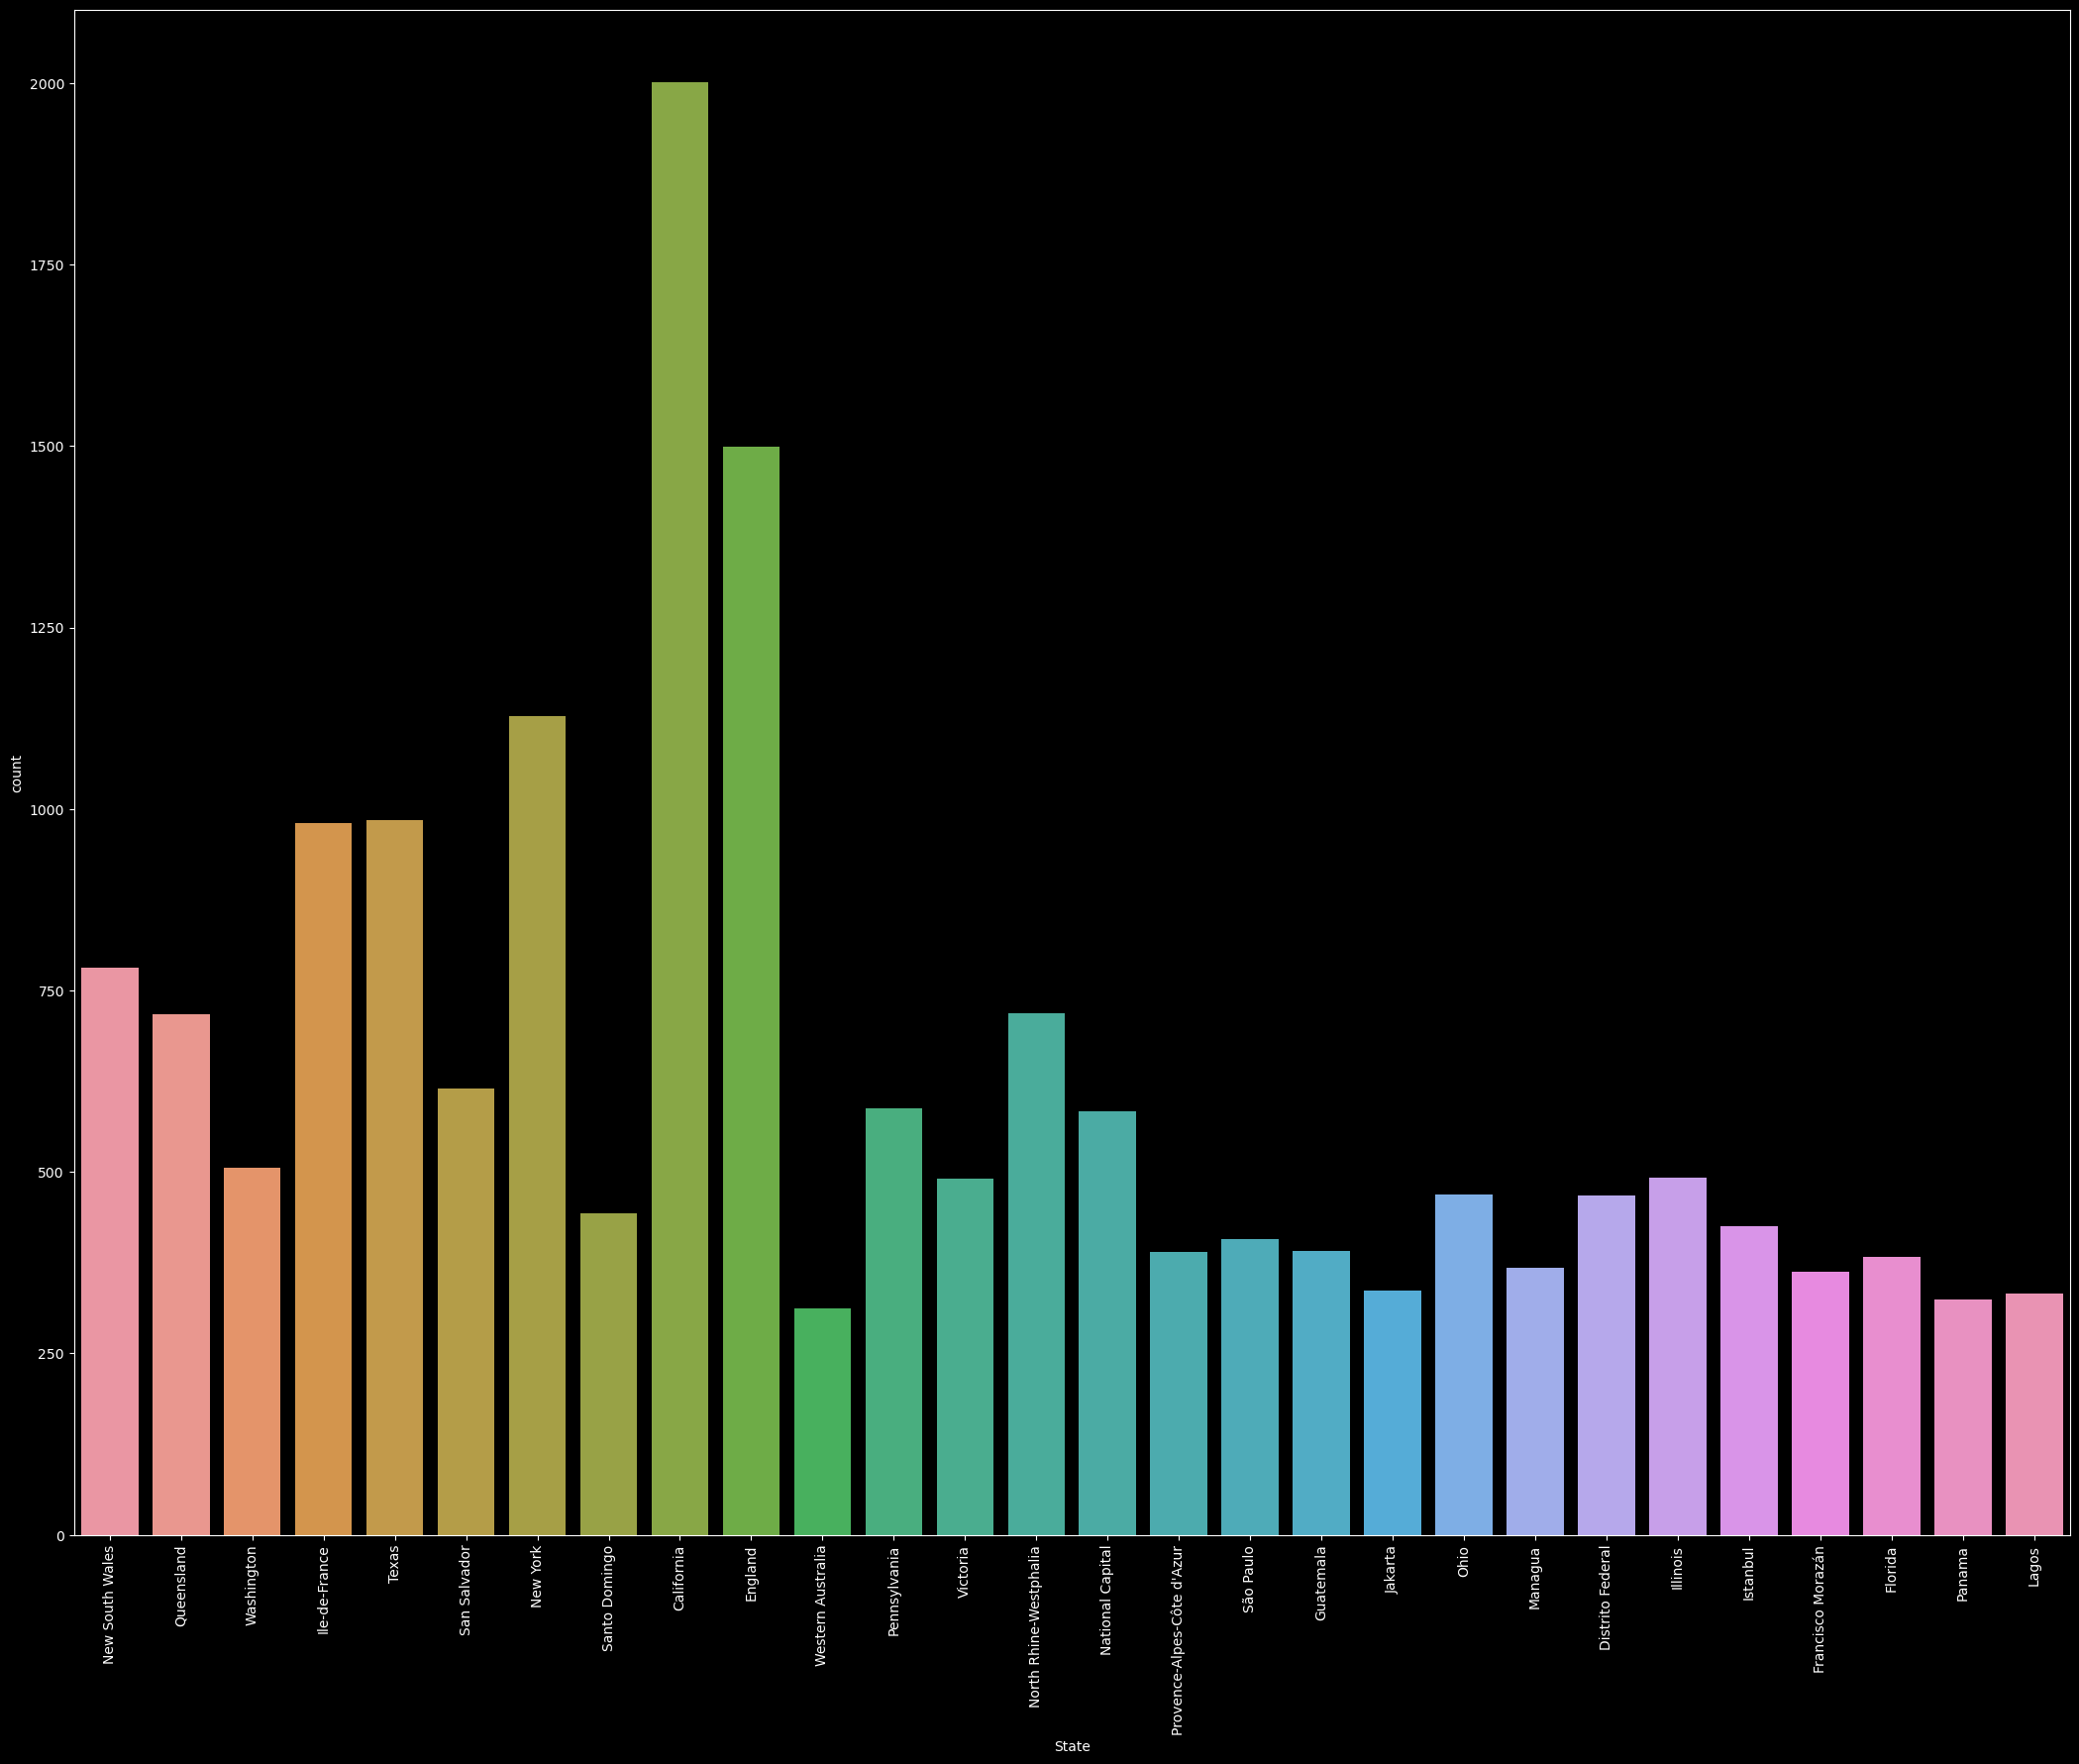

In [371]:
plt.figure(figsize = (26,20))
ax = sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show()

# Visualizing The Country

In [375]:
sort_contry=df.sort_values("Country")

C:\Users\Pangat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


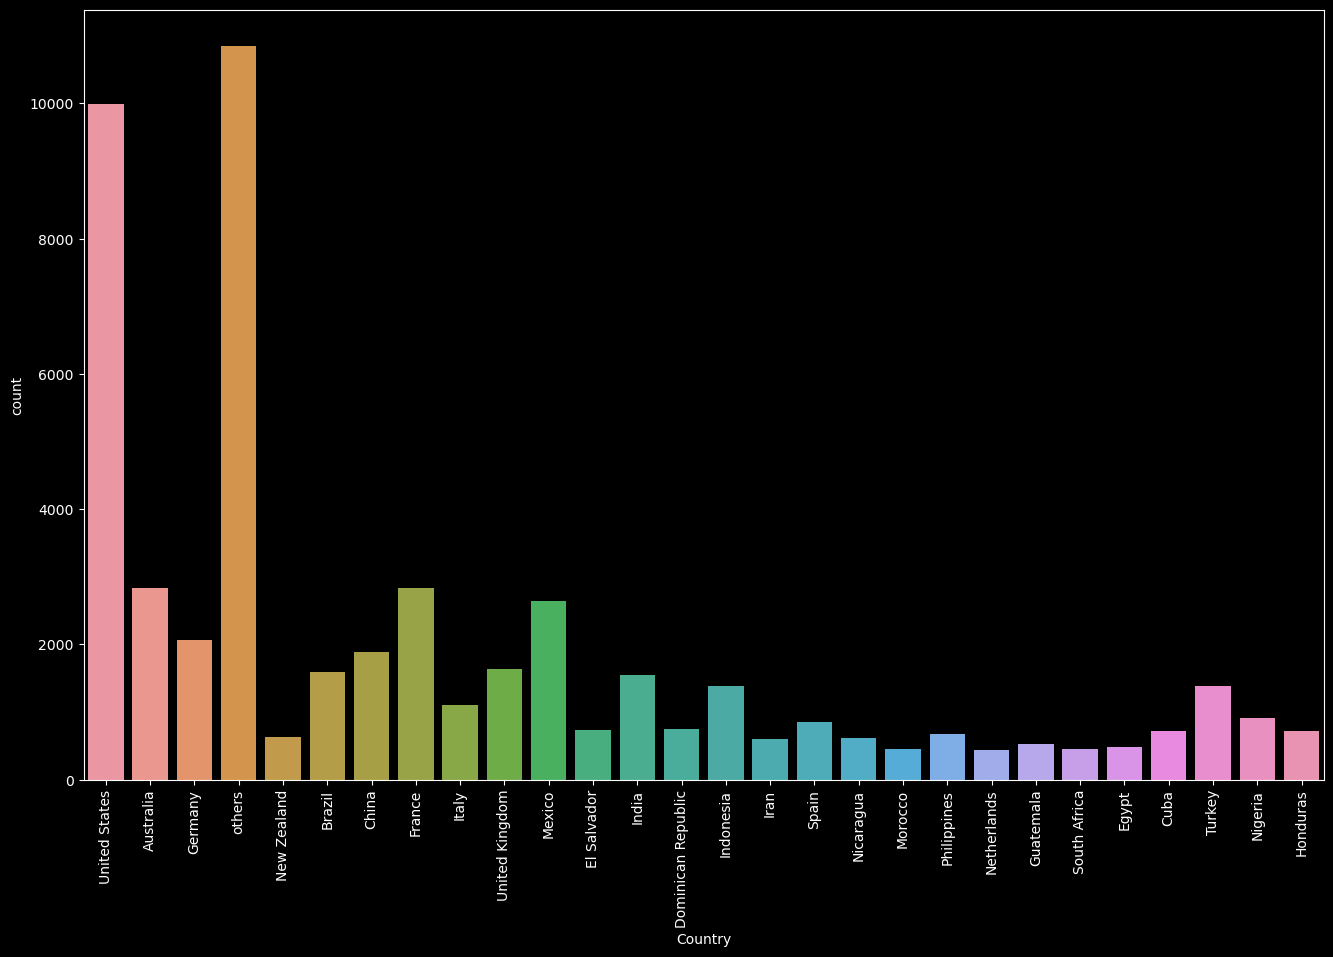

In [376]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['Country'],data=sort_contry)
plt.xticks(rotation=90)
plt.show()

# Visualizing The Region

C:\Users\Pangat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


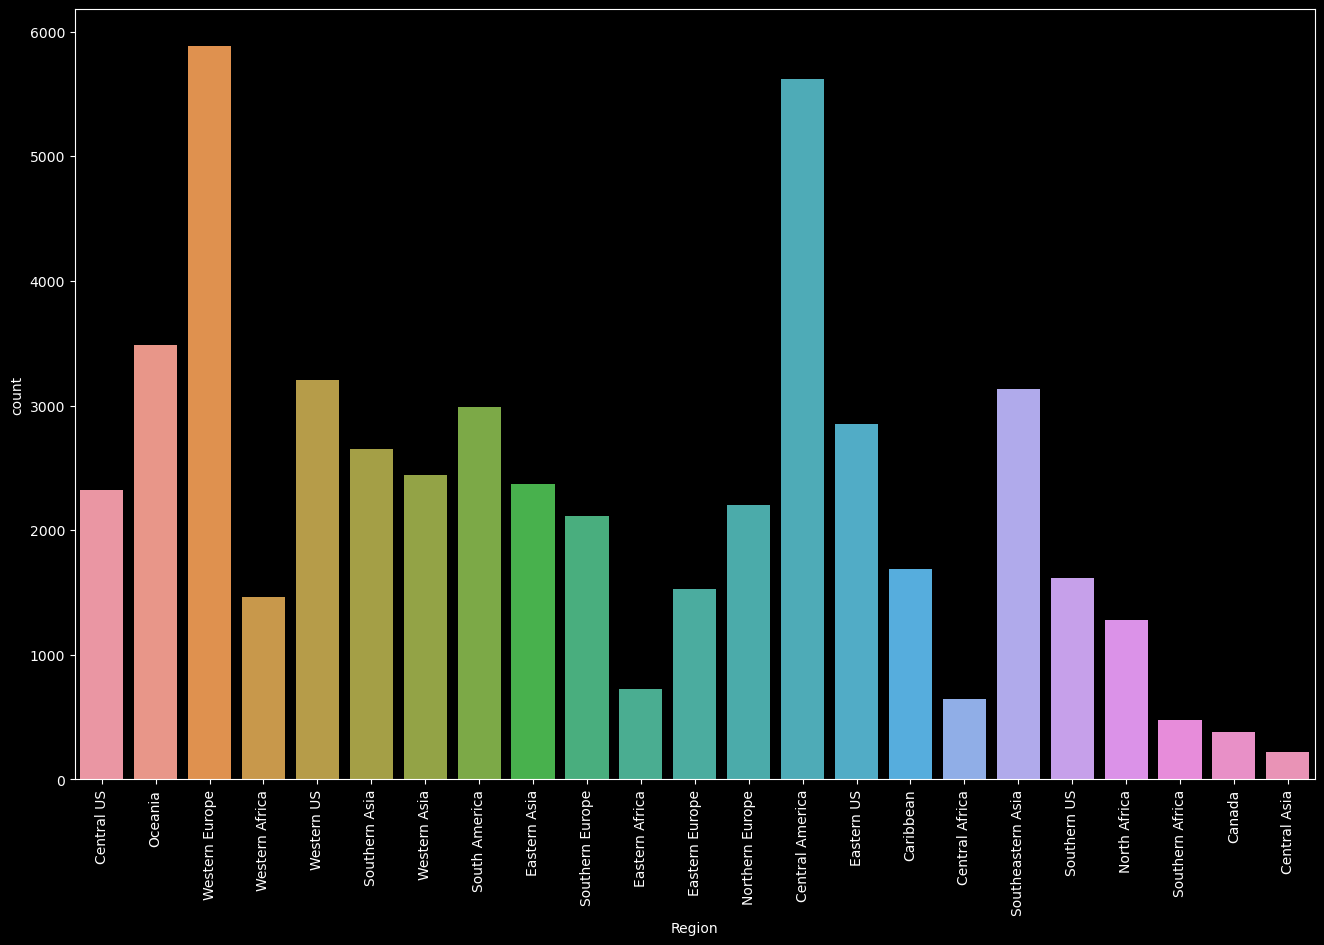

In [377]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['Region'])
plt.xticks(rotation=90)
plt.show()

# Visualizing The Market

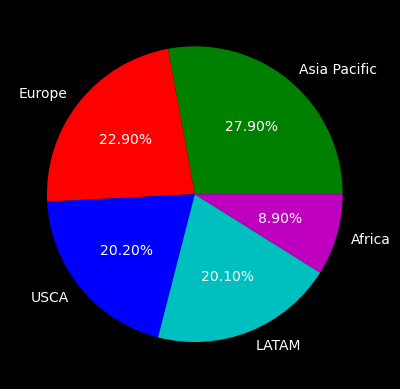

In [379]:
stu=['Asia Pacific','Europe','USCA','LATAM','Africa']
colors=['g','r','b','c','m']
plt.pie([27.9,22.9,20.2,20.1,8.9],labels=stu,autopct="%0.2f%%",colors=colors)
plt.show()

# Visualizing The Order Priority

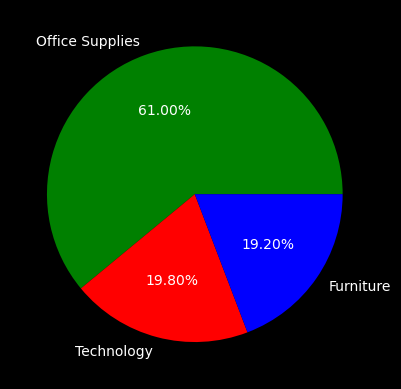

In [380]:
stu=['Office Supplies','Technology','Furniture']
colors=['g','r','b']
plt.pie([61,19.8,19.2],labels=stu,autopct="%0.2f%%",colors=colors)
plt.show()

# Visualizing The Sub_Category

C:\Users\Pangat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


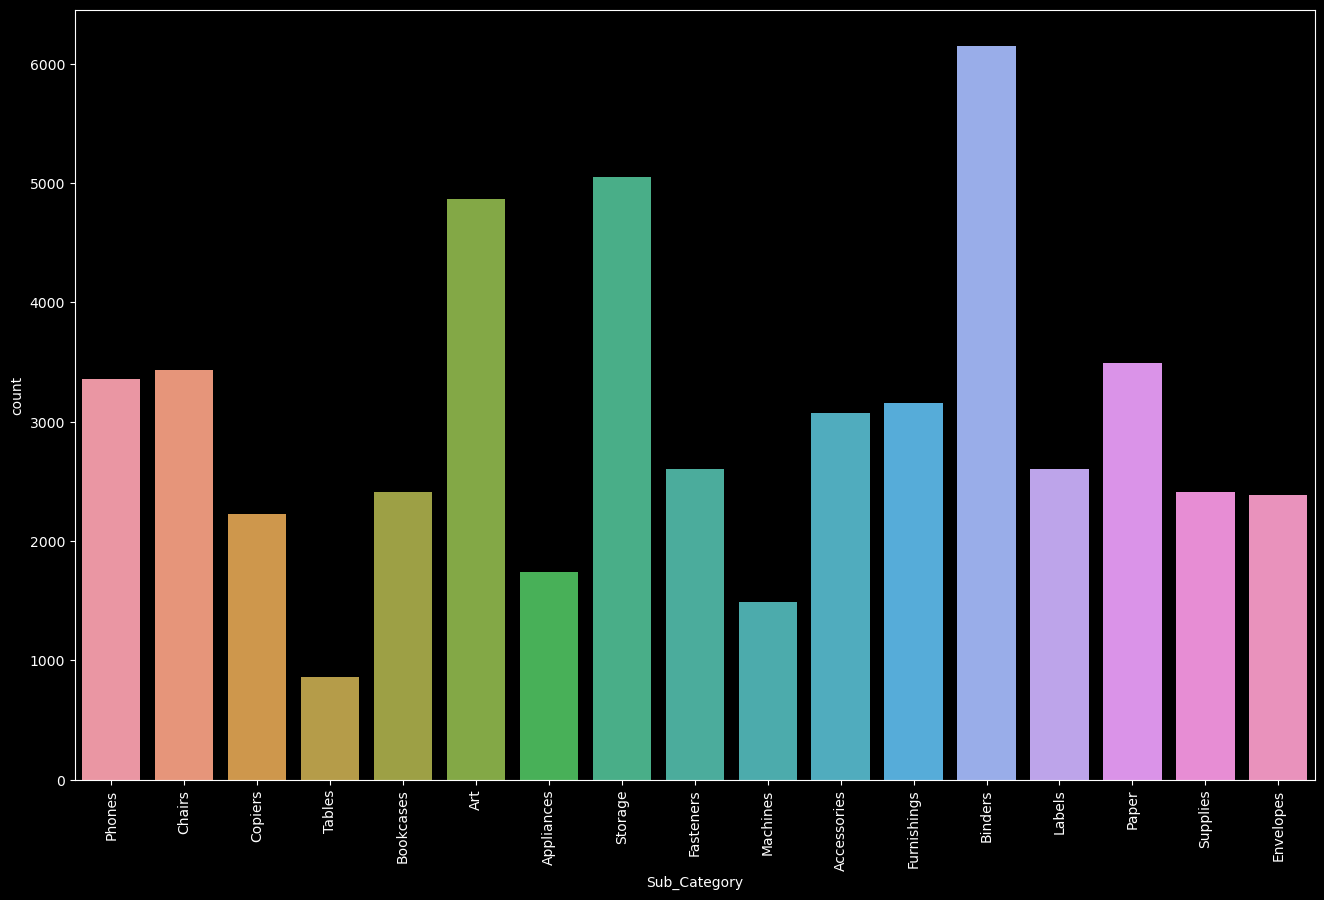

In [381]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['Sub_Category'])
plt.xticks(rotation=90)
plt.show()

# Visualizing The  Category Vs Discount

C:\Users\Pangat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


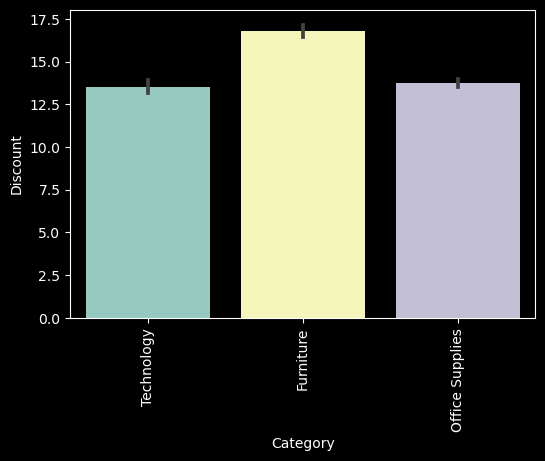

In [382]:
plt.figure(figsize = (6,4))
sns.barplot(df.Category , df['Discount'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize = (16,10))
ax = sns.countplot(df['Sub_Category'])
plt.xticks(rotation=90)
plt.show()

# Visualizing The Sales and Profit

<Figure size 1000x1500 with 0 Axes>

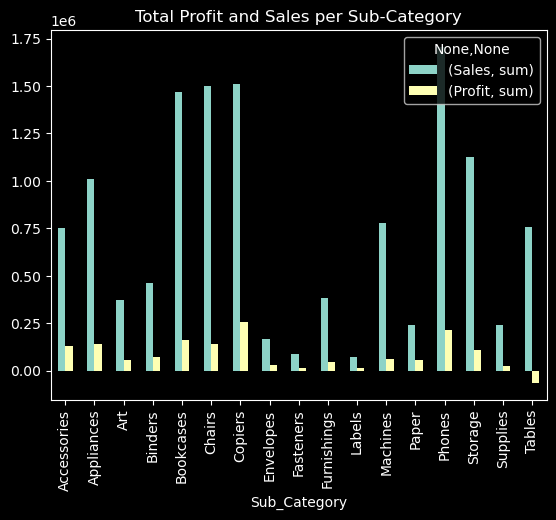

In [383]:
plt.figure(figsize=(10,15))
Profit_Sales.agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()